In [33]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
# Set the input shape for MobileNet
input_shape = (48, 48, 3)

In [35]:
# Create the input layer
input_layer = Input(shape=input_shape)

In [36]:
# Load the MobileNet model (without top layers)
base_model = MobileNet(weights='imagenet', include_top=False, input_tensor=input_layer)

In [37]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False


In [39]:
# Add additional layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Add a dense layer with 1024 units
x = Dense(512, activation='relu')(x)  # Add a dense layer with 512 units
x = Dense(256, activation='relu')(x)  # Add a dense layer with 256 units
x = Dense(128, activation='relu')(x)  # Add a dense layer with 128 units
output = Dense(7, activation='softmax')(x)  # Add the output layer with the appropriate number of units/classes

In [40]:
# Create the final model
model = Model(inputs=base_model.input, outputs=output)

In [41]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   shear_range=0.3,
                                   zoom_range=0.3,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [43]:
# Rescaling for test set (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

In [44]:
# Set the directories for train and test sets
train_dir = 'C:/Users/User/Desktop/cvpr/Project/Facial Recognition/train'
test_dir = 'C:/Users/User/Desktop/cvpr/Project/Facial Recognition/test'

In [45]:
# Set the batch size
batch_size = 64

In [46]:
# Create the train and test data generators
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(48, 48),
                                                    batch_size=batch_size,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    shuffle=True)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(48, 48),
                                                  batch_size=batch_size,
                                                  color_mode='rgb',
                                                  class_mode='categorical',
                                                  shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [47]:
# Set the number of training and test samples
num_train_samples = train_generator.samples
num_test_samples = test_generator.samples

In [48]:
# Set the number of training and validation steps per epoch
train_steps_per_epoch = num_train_samples // batch_size
test_steps_per_epoch = num_test_samples // batch_size


In [49]:
# Train the model
model.fit(train_generator,
          steps_per_epoch=train_steps_per_epoch,
          epochs=10,
          validation_data=test_generator,
          validation_steps=test_steps_per_epoch)

Epoch 1/10
448/448 [==============================] - 156s 343ms/step - loss: 1.8026 - accuracy: 0.2500 - val_loss: 1.7745 - val_accuracy: 0.2508
Epoch 2/10
448/448 [==============================] - 117s 262ms/step - loss: 1.7904 - accuracy: 0.2541 - val_loss: 1.7585 - val_accuracy: 0.2740
Epoch 3/10
448/448 [==============================] - 120s 267ms/step - loss: 1.7882 - accuracy: 0.2575 - val_loss: 1.7597 - val_accuracy: 0.2651
Epoch 4/10
448/448 [==============================] - 114s 255ms/step - loss: 1.7867 - accuracy: 0.2581 - val_loss: 1.7600 - val_accuracy: 0.2778
Epoch 5/10
448/448 [==============================] - 114s 255ms/step - loss: 1.7857 - accuracy: 0.2558 - val_loss: 1.7596 - val_accuracy: 0.2683
Epoch 6/10
448/448 [==============================] - 116s 259ms/step - loss: 1.7850 - accuracy: 0.2543 - val_loss: 1.7645 - val_accuracy: 0.2658
Epoch 7/10
448/448 [==============================] - 123s 275ms/step - loss: 1.7869 - accuracy: 0.2542 - val_loss: 1.7619 -

In [51]:
import matplotlib.pyplot as plt

In [52]:
# Train the model and store the training history
history = model.fit(train_generator, steps_per_epoch=train_steps_per_epoch, epochs=50, validation_data=test_generator, validation_steps=test_steps_per_epoch)

Epoch 1/50
448/448 [==============================] - 116s 259ms/step - loss: 1.7861 - accuracy: 0.2568 - val_loss: 1.7630 - val_accuracy: 0.2607
Epoch 2/50
448/448 [==============================] - 103s 229ms/step - loss: 1.7844 - accuracy: 0.2580 - val_loss: 1.7548 - val_accuracy: 0.2655
Epoch 3/50
448/448 [==============================] - 91s 202ms/step - loss: 1.7820 - accuracy: 0.2570 - val_loss: 1.7669 - val_accuracy: 0.2603
Epoch 4/50
448/448 [==============================] - 92s 205ms/step - loss: 1.7819 - accuracy: 0.2574 - val_loss: 1.7655 - val_accuracy: 0.2655
Epoch 5/50
448/448 [==============================] - 90s 200ms/step - loss: 1.7824 - accuracy: 0.2600 - val_loss: 1.7578 - val_accuracy: 0.2759
Epoch 6/50
448/448 [==============================] - 90s 202ms/step - loss: 1.7815 - accuracy: 0.2584 - val_loss: 1.7605 - val_accuracy: 0.2720
Epoch 7/50
448/448 [==============================] - 89s 200ms/step - loss: 1.7821 - accuracy: 0.2556 - val_loss: 1.7608 - val_

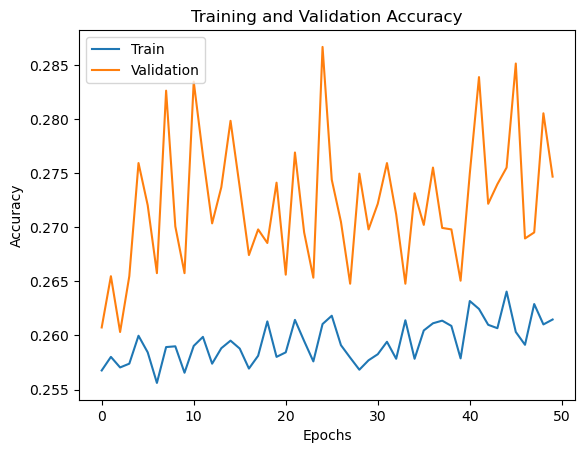

In [53]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

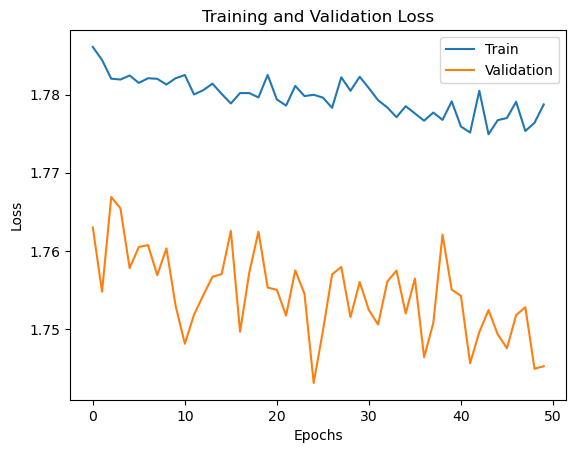

In [54]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [55]:
# Save the model
model.save('fer2013_mobilenet.h5')